In [31]:
import os
import numpy as np
from scipy import signal
from scipy import interpolate
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd

%matplotlib notebook

<IPython.core.display.Javascript object>


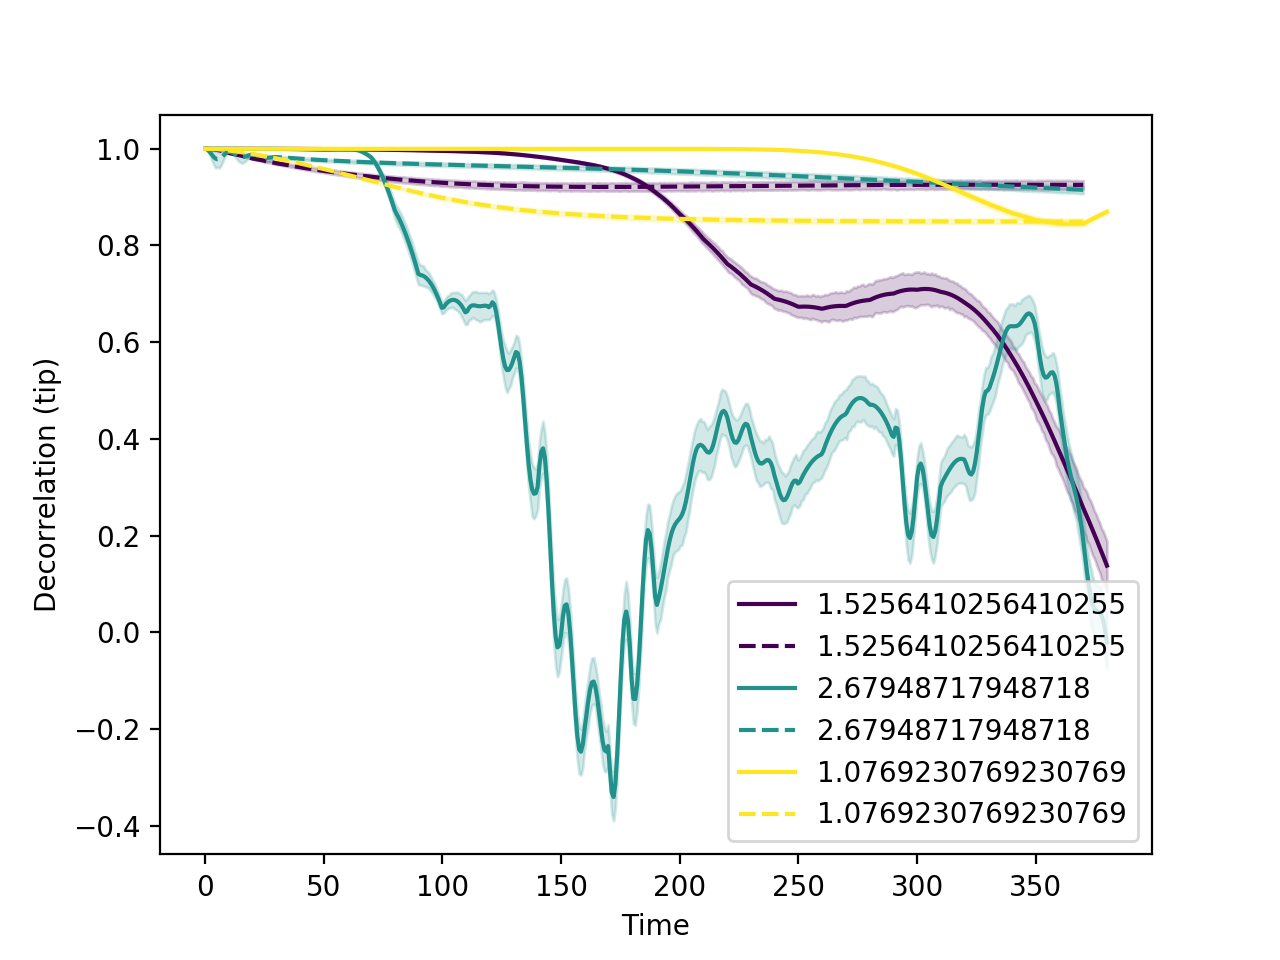

../../../processed_data/OrientationDecorrelation/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.5256410256410255_activityTime_750_simType_point
SimResults_00.hdf5_OrientationDecorrelation.csv
metadata.csv
../../../processed_data/OrientationDecorrelation/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_2.6794871794871793_activityTime_750_simType_point
SimResults_00.hdf5_OrientationDecorrelation.csv
metadata.csv
../../../processed_data/OrientationDecorrelation/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.0769230769230769_activityTime_750_simType_point
SimResults_00.hdf5_OrientationDecorrelation.csv
metadata.csv


In [41]:
data_folder = '../../../processed_data/OrientationDecorrelation'

# data_folder = '/home/deepak/processed_data/OrientationDecorrelation'

n_datasets = len(os.listdir(data_folder))

cmap = plt.cm.get_cmap('viridis', 255)
colors = [cmap(ii) for ii in np.linspace(0,1, n_datasets)]

parameter_variable = 'potDipole strength'

fig, ax0 = plt.subplots(nrows = 1, ncols = 1)

title = 'Tip Orientation decorrelation function (mean)'

for ii, folder in enumerate(os.listdir(data_folder)):

    cwd = os.path.join(data_folder, folder)
    print(cwd)
    os.chdir(cwd)
    
    data_file = [file for file in os.listdir(cwd) if file.endswith('.csv') and 'metadata' not in file]
    
    print(data_file[0])
    metadata_file = [file for file in os.listdir(cwd) if file.endswith('.csv') and 'metadata' in file]
    print(metadata_file[0])
    
    df_orient_decorr = pd.read_csv(data_file[0])
    df_metadata = pd.read_csv(metadata_file[0])
    
    sns.lineplot(ax = ax0, x = 'Time', y = 'Decorrelation (tip)', data = df_orient_decorr, style = 'Phase', 
                 color = colors[ii], ci = 95, label = df_metadata[parameter_variable][0], legend = False)

plt.legend()
plt.show()
